<a href="https://colab.research.google.com/github/Mangai2024/House_Price_Prediction-With-Regression-models/blob/main/House_Price_regression_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Step 1- basic analysis code
import pandas as pd

In [7]:
#Load Dataset
df=pd.read_csv("//content/house_price_regression_dataset.csv")

In [8]:
#Basic Analysis
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nPreview:\n", df.head())
print("\nDatatypes:\n", df.dtypes)


Shape: (1000, 8)
Columns: ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price']

Preview:
    Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  

Datatypes:
 Square_Footage            int64
Num_Bedrooms              int64
Num

In [9]:
#Step 2 EDA Process
missing_values = df.isnull().sum()
print(missing_values)

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


In [10]:
#Duplicates Check
duplicates_count = df.duplicated().sum()

In [11]:
print(duplicates_count)

0


In [12]:
#Basic Statistics
statistics = df.describe()
print(statistics)

       Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564       0.820332    20.632916     1.297903   
min        503.000000      1.000000       1.000000  1950.000000     0.506058   
25%       1749.500000      2.000000       1.000000  1969.000000     1.665946   
50%       2862.500000      3.000000       2.000000  1986.000000     2.809740   
75%       3849.500000      4.000000       3.000000  2004.250000     3.923317   
max       4999.000000      5.000000       3.000000  2022.000000     4.989303   

       Garage_Size  Neighborhood_Quality   House_Price  
count  1000.000000           1000.000000  1.000000e+03  
mean      1.022000              5.615000  6.188610e+05  
std       0.814973              2.887059  2.535681e+05  
min       0.000000              1.000000  1.116269e

In [13]:
#Correlation matrix
correlation = df.corr()
print(correlation)

                      Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  \
Square_Footage              1.000000     -0.043564      -0.031584   -0.022392   
Num_Bedrooms               -0.043564      1.000000       0.022848   -0.015820   
Num_Bathrooms              -0.031584      0.022848       1.000000   -0.021063   
Year_Built                 -0.022392     -0.015820      -0.021063    1.000000   
Lot_Size                    0.089479     -0.009355       0.034923   -0.061050   
Garage_Size                 0.030593      0.113761       0.024846   -0.025485   
Neighborhood_Quality       -0.008357     -0.049024       0.017585   -0.009549   
House_Price                 0.991261      0.014633      -0.001862    0.051967   

                      Lot_Size  Garage_Size  Neighborhood_Quality  House_Price  
Square_Footage        0.089479     0.030593             -0.008357     0.991261  
Num_Bedrooms         -0.009355     0.113761             -0.049024     0.014633  
Num_Bathrooms         0.034

In [14]:
# 5. Target variable distribution
target_summary = df["House_Price"].describe()
print(target_summary)

count    1.000000e+03
mean     6.188610e+05
std      2.535681e+05
min      1.116269e+05
25%      4.016482e+05
50%      6.282673e+05
75%      8.271413e+05
max      1.108237e+06
Name: House_Price, dtype: float64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
corr=df.corr()

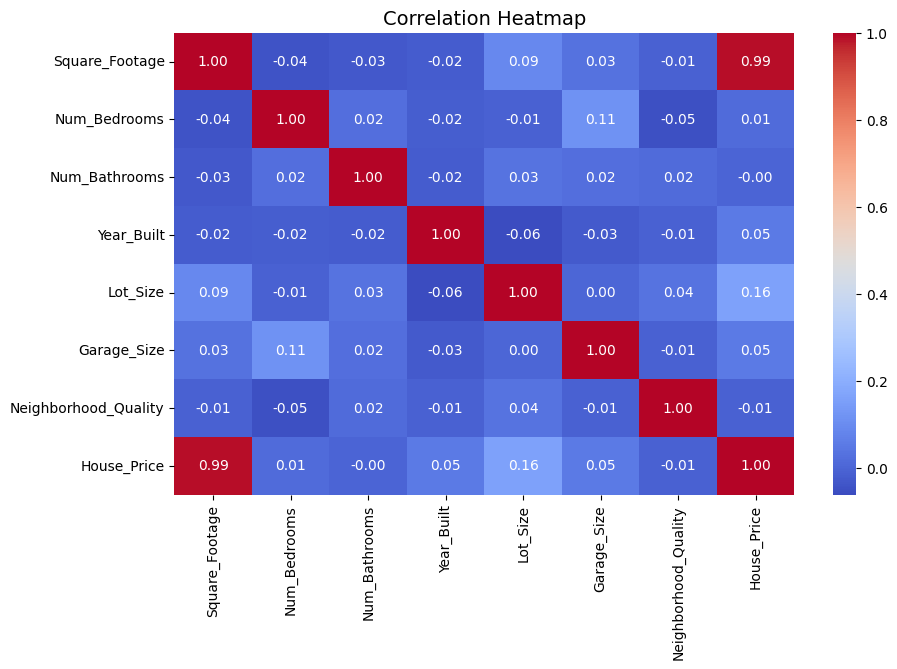

In [17]:
#plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [18]:
#3. Preprocessing step with scales
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
#Split features(x)and target(y)
x = df.drop(columns=["House_Price"])#inputs
y = df["House_Price"] #Target

In [20]:
#Train_Test_Split
x_train, x_test, y_train, y_test = train_test_split(
    x,y,  test_size=0.2, random_state=42
)

In [21]:
#scale features
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled =scaler.transform(x_test)

In [22]:
#check result
print("Train shape:", x_train_scaled.shape)
print("Test shape:", x_test_scaled.shape)

Train shape: (800, 7)
Test shape: (200, 7)


In [23]:
#Train Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [24]:
#initialize model
model = LinearRegression()

In [25]:
#train(fit) model on training data
model.fit(x_train_scaled, y_train)

LinearRegression()

In [26]:
#predict on test data
y_pred = model.predict(x_test_scaled)

In [27]:
#Evaluate model
mse =mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [28]:
print("RMSE:", round(rmse,2))
print("R2 score:", round(r2, 4))

RMSE: 10071.48
R2 score: 0.9984


In [29]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor(
    n_estimators=300, #number of trees
    max_depth=None, #Let tree grow fully
    random_state=42,
    n_jobs=-1 #use all CPU cores
)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [31]:
#predict & evaluate
rf_pred=rf.predict(x_test)
rf_rmse=np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2=r2_score(y_test, rf_pred)

In [32]:
print("RandomForest RMSE:", round(rf_rmse, 2))
print("RandomForest R2:", round (rf_r2, 4))

RandomForest RMSE: 19617.0
RandomForest R2: 0.994


In [33]:
#XGBoost Regressor
!pip install xgboost

In [36]:
from xgboost import XGBRegressor

In [37]:
xgb = XGBRegressor(
    n_estimators=500, #trees
    learning_rate=0.05, #step Size
    max_depth=6, #tree depth
    subsample=0.8, #rowsampling
    random_state=42,
    n_jobs=-1
)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [38]:
#predict & evaluate
xgb_pred = xgb.predict(x_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)
print("XGBoost RMSE:", round(xgb_rmse, 2))
print("XGBoost R2:", round(xgb_r2, 4))

XGBoost RMSE: 13963.13
XGBoost R2: 0.997
